In [1]:
# example of Support Vector Machine using Iris Dataset

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

In [2]:
# Split the dataset into training and testing sets
# We use a 80-20 split here for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
# SVM performs better when features are scaled
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Initialize the Support Vector Classifier with a linear kernel
svc = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test)

In [4]:
# Evaluate the model
# Confusion matrix to understand the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [5]:
# Classification report for precision, recall, and f1-score
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [7]:
# Visualize the decision boundaries for the first two features
def plot_decision_boundaries(X, y, model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Predict class labels for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contours
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    
    # Add legend
    plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title('SVM Decision Boundaries')
    plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

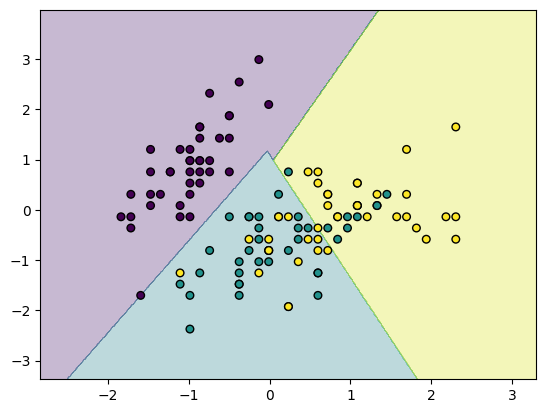

In [8]:
# For simplicity, use only the first two features
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Retrain the model using only the first two features
svc_2d = SVC(kernel='linear', C=1.0, random_state=42)
svc_2d.fit(X_train_2d, y_train)

# Plot decision boundaries
plot_decision_boundaries(X_train_2d, y_train, svc_2d)